# 1. Imports

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Loading the dataset

In [10]:
dataset = pd.read_csv("../../data/processed/COEN498-691_HAR_preprocessed_dataset.csv")
df = pd.DataFrame(dataset)

In [11]:
activity_mapper = {
    'sitting': 1,
    'walking': 2,
    'running': 3,
    'lying': 4,
}

# 3. Training Random Forest classifier (all features)
**Train the model using all features in the original dataset and default hyperparameters. Use Leave-One-Subject-Out (LOSO) cross validation.**

## 3.1. Classification report and confusion matrix

Results for YL
Accuracy: 0.3396
Classification Report:
              precision    recall  f1-score   support

           1       0.19      0.26      0.22       234
           2       0.28      0.26      0.27       234
           3       0.57      0.49      0.53       245
           4       0.39      0.33      0.36       244

    accuracy                           0.34       957
   macro avg       0.36      0.34      0.35       957
weighted avg       0.36      0.34      0.35       957



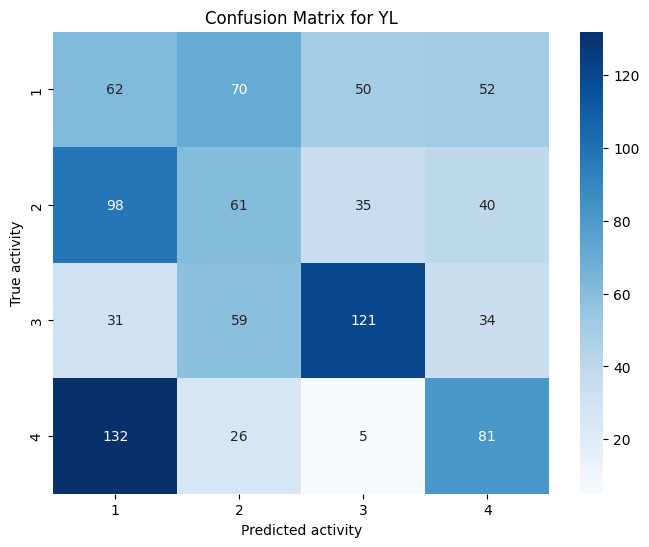

Results for ZM
Accuracy: 0.2746
Classification Report:
              precision    recall  f1-score   support

           1       0.21      0.21      0.21       253
           2       0.41      0.62      0.49       229
           3       0.16      0.12      0.14       234
           4       0.23      0.16      0.19       238

    accuracy                           0.27       954
   macro avg       0.25      0.28      0.26       954
weighted avg       0.25      0.27      0.25       954



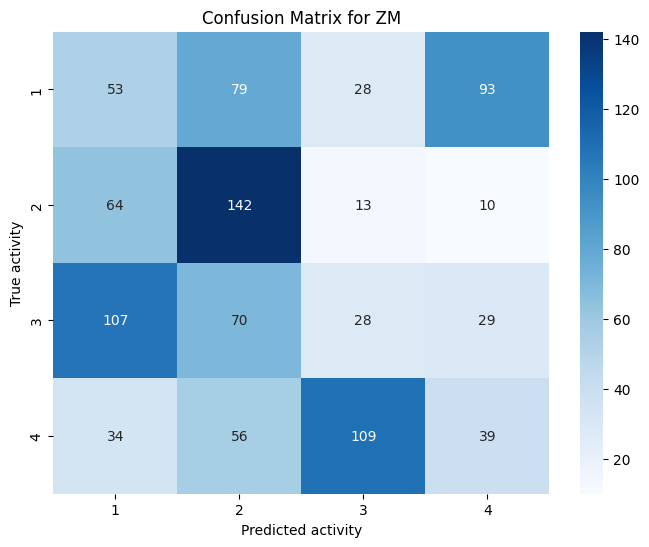

Results for YT
Accuracy: 0.1342
Classification Report:
              precision    recall  f1-score   support

           1       0.15      0.14      0.14       243
           2       0.15      0.19      0.17       237
           3       0.15      0.16      0.15       237
           4       0.07      0.05      0.06       237

    accuracy                           0.13       954
   macro avg       0.13      0.13      0.13       954
weighted avg       0.13      0.13      0.13       954



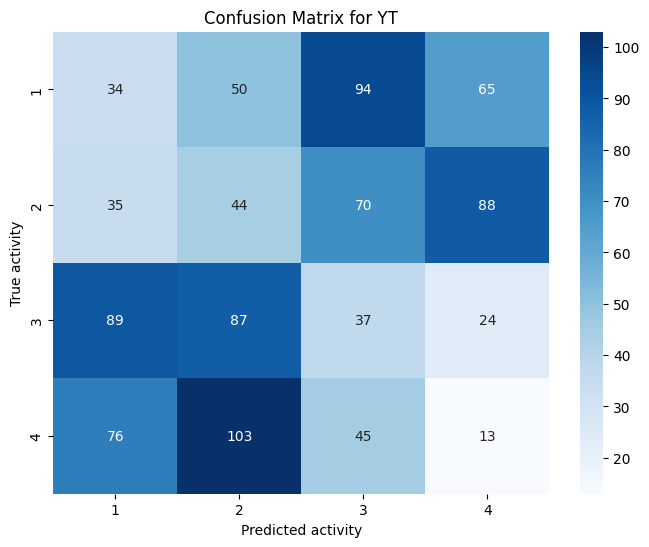

Results for VV
Accuracy: 0.2768
Classification Report:
              precision    recall  f1-score   support

           1       0.25      0.31      0.28       236
           2       0.24      0.13      0.17       235
           3       0.35      0.23      0.28       231
           4       0.28      0.43      0.34       248

    accuracy                           0.28       950
   macro avg       0.28      0.27      0.27       950
weighted avg       0.28      0.28      0.27       950



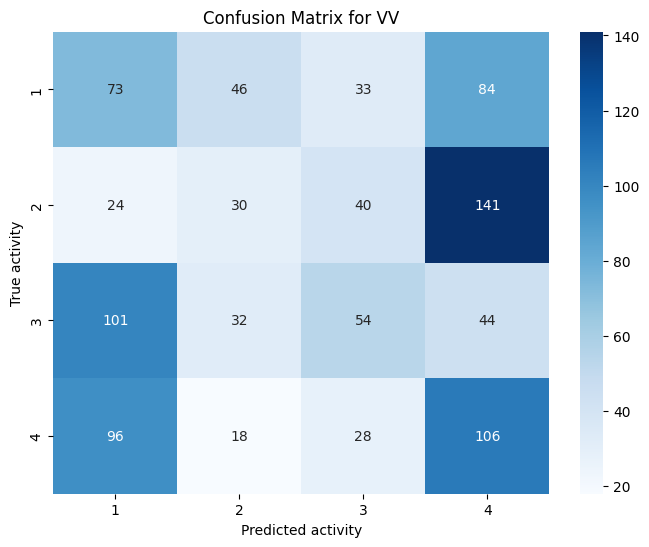

Results for LL
Accuracy: 0.2382
Classification Report:
              precision    recall  f1-score   support

           1       0.22      0.32      0.26       239
           2       0.33      0.38      0.35       231
           3       0.08      0.04      0.06       237
           4       0.25      0.21      0.23       229

    accuracy                           0.24       936
   macro avg       0.22      0.24      0.22       936
weighted avg       0.22      0.24      0.22       936



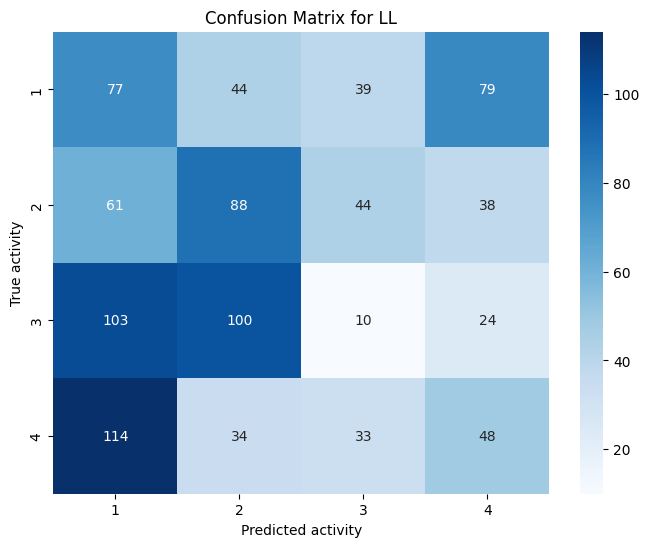

In [ ]:
groups = df['participant_id']
feature_columns = df.columns.difference(['participant_id', 'activity_id'])
activity_labels = sorted(df['activity_id'].unique())
gkf = GroupKFold(n_splits=5) 
classification_reports = []

for train_index, test_index in gkf.split(df, df['activity_id'], groups):

    train_set = df.iloc[train_index]
    test_set = df.iloc[test_index]

    X_train = train_set[feature_columns]
    y_train = train_set['activity_id']
    X_test = test_set[feature_columns]
    y_test = test_set['activity_id']

    test_participant_id = test_set['participant_id'].iloc[0]

    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(report)
    print(f"Results for {test_participant_id}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=activity_labels, columns=activity_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {test_participant_id}')
    plt.xlabel('Predicted activity')
    plt.ylabel('True activity')
    plt.show() 


## 3.2. Average weighted F1-score

In [17]:
weighted_f1_scores = [report['weighted avg']['f1-score'] for report in classification_reports]
average_weighted_f1 = np.mean(weighted_f1_scores)
print(f"Average weighted F1-score: {average_weighted_f1:.4f}")

Average weighted F1-score: 0.2448


# 3.3. Observations
The model performs somewhat well. The model predicts walking (2) and running (3) almost perfectly, but struggles to correctly distinguish between sitting (1) and lying down (4). The features prioritized by the classifier are indicators of motion (sma, std, min, max, range), therefore it might struggle to identify static activities. The f1-score varies quite significantly between test participants and activities.


# 4. Selecting features and scaling
**Check if we can improve the performance of the model by selecting a subset of features and scaling.**

Results for YL
Accuracy: 0.8986
Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.80      0.79       234
           2       1.00      1.00      1.00       234
           3       1.00      1.00      1.00       245
           4       0.80      0.80      0.80       244

    accuracy                           0.90       957
   macro avg       0.90      0.90      0.90       957
weighted avg       0.90      0.90      0.90       957



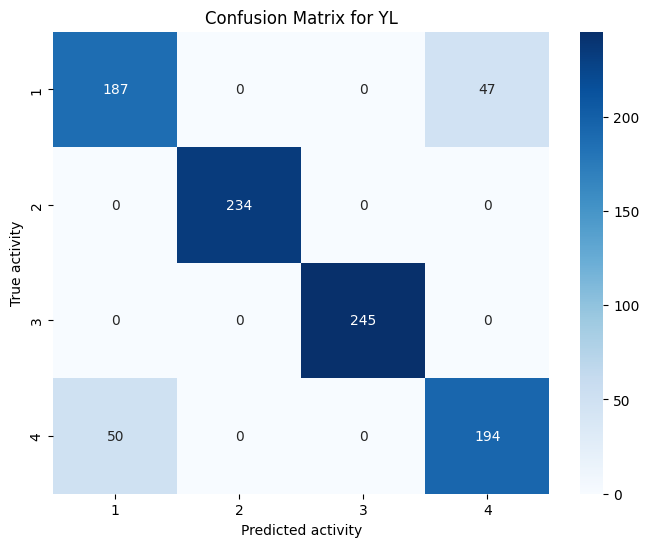

Results for ZM
Accuracy: 0.8029
Classification Report:
              precision    recall  f1-score   support

           1       0.60      0.79      0.68       253
           2       1.00      1.00      1.00       229
           3       1.00      1.00      1.00       234
           4       0.66      0.44      0.53       238

    accuracy                           0.80       954
   macro avg       0.81      0.81      0.80       954
weighted avg       0.81      0.80      0.80       954



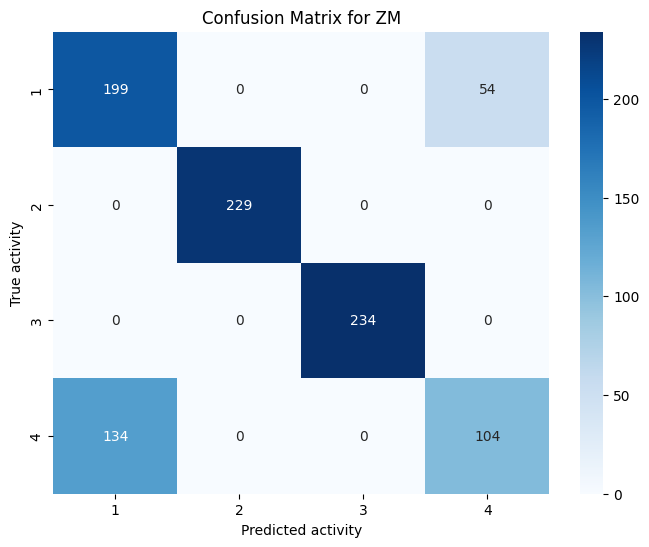

Results for YT
Accuracy: 0.8449
Classification Report:
              precision    recall  f1-score   support

           1       0.63      0.95      0.76       243
           2       1.00      1.00      1.00       237
           3       1.00      1.00      1.00       237
           4       0.89      0.43      0.58       237

    accuracy                           0.84       954
   macro avg       0.88      0.84      0.83       954
weighted avg       0.88      0.84      0.83       954



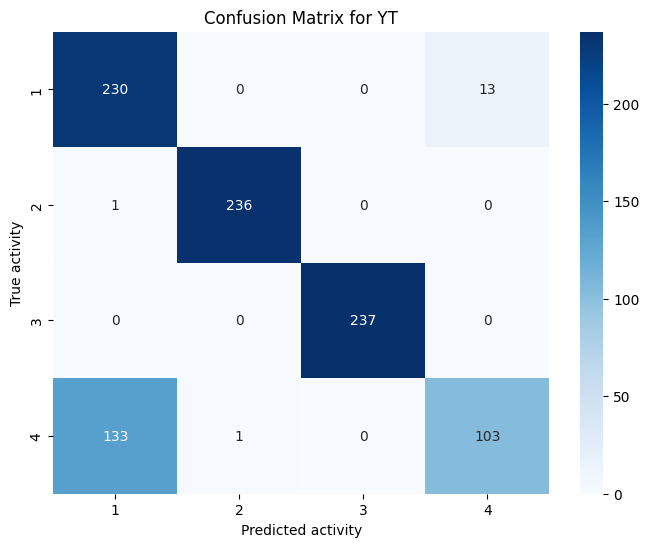

Results for VV
Accuracy: 0.7726
Classification Report:
              precision    recall  f1-score   support

           1       0.52      0.92      0.67       236
           2       1.00      1.00      1.00       235
           3       1.00      1.00      1.00       231
           4       0.72      0.21      0.33       248

    accuracy                           0.77       950
   macro avg       0.81      0.78      0.75       950
weighted avg       0.81      0.77      0.74       950



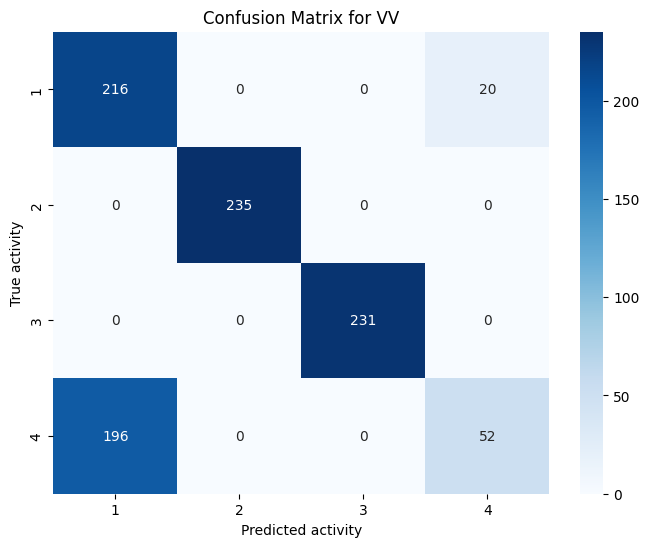

Results for LL
Accuracy: 0.8600
Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.82      0.75       239
           2       0.98      1.00      0.99       231
           3       1.00      1.00      1.00       237
           4       0.79      0.61      0.69       229

    accuracy                           0.86       936
   macro avg       0.86      0.86      0.86       936
weighted avg       0.86      0.86      0.86       936



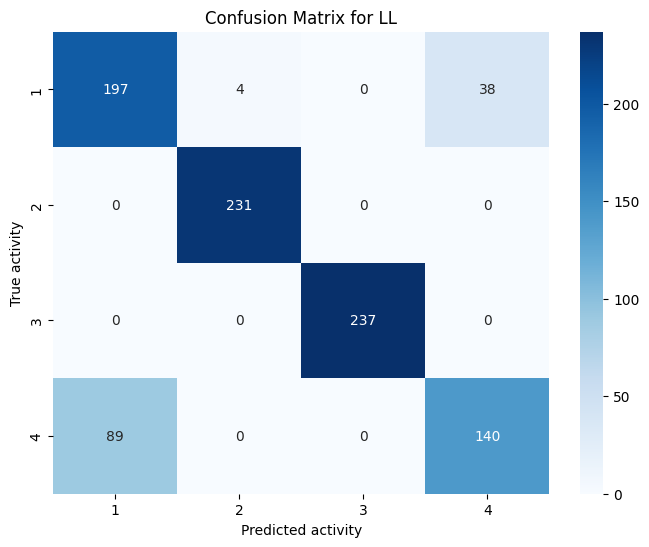

Average weighted F1-score: 0.8092


In [ ]:
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(criterion='gini',n_estimators=150, random_state=42))
])

for train_index, test_index in gkf.split(df, df['activity_id'], groups):

    train_set = df.iloc[train_index]
    test_set = df.iloc[test_index]

    X_train = train_set[feature_columns]
    y_train = train_set['activity_id']
    X_test = test_set[feature_columns]
    y_test = test_set['activity_id']

    test_participant_id = test_set['participant_id'].iloc[0]

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(report)
    print(f"Results for {test_participant_id}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=activity_labels, columns=activity_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {test_participant_id}')
    plt.xlabel('Predicted activity')
    plt.ylabel('True activity')
    plt.show() 

weighted_f1_scores = [report['weighted avg']['f1-score'] for report in classification_reports]
average_weighted_f1 = np.mean(weighted_f1_scores)
print(f"Average weighted F1-score: {average_weighted_f1:.4f}")

# 5. Hyperparameter tuning
**Check if we can improve the performance of the model by tuning the model hyperparameters**